# MNIST For ML Beginners

### Softmax Regression
Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression)
is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). 

In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Import data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8df1aeadd8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8e242e3400>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8e0434d978>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape

(55000, 10)

In [7]:
#Placeholders
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [8]:
# Create the model: xW + b
y = tf.matmul(x, W) + b

In [9]:
# Define cost function
cost_func = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [10]:
# Define training step
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost_func)

In [11]:
# Start a TF session
sess = tf.InteractiveSession()

# initialize the variables
tf.global_variables_initializer().run()

In [12]:
# Train
for _ in range(100):
    x_batch, y_batch = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict={x: x_batch, y_: y_batch})

In [13]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

0.8717


## Test image

In [14]:
testimage = mnist.test.images[56]

In [15]:
testimage.shape

(784,)

In [16]:
mnist.test.labels[56]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

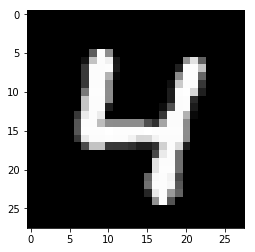

In [17]:
plt.imshow(testimage.reshape(28,28), cmap='gray')
plt.show()

In [18]:
prediction=tf.argmax(y,1)

In [19]:
prediction.eval(feed_dict={x: [testimage]}, session=sess)

array([4])